# Cognetti - Bulk Data Cleanup & Exploratory Data Analysis
# AIT664
# December 3, 2024
<hr>

## Setup and Imports

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML

In [4]:
#Low memory to false, otherwise error
listings_df = pd.read_csv('O:\Big Files for School\AIT 664\listings.csv', sep=",",low_memory=False)

In [5]:
listings_df.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
5,53190949,https://www.airbnb.com/rooms/53190949,20240904164109,2024-09-04,city scrape,Nice cozy short stay.,You will be comfortable in this spacious and u...,NaN,https://a0.muscache.com/pictures/8e6fc377-c5b7...,351763192,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
6,1020282701018874374,https://www.airbnb.com/rooms/1020282701018874374,20240904164109,2024-09-04,city scrape,Trendy Private Bedroom,The Atlantic House is located in Crown Heights...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,483056418,...,NaN,NaN,NaN,NaN,f,24,5,19,0,NaN
7,1029666092532042199,https://www.airbnb.com/rooms/1029666092532042199,20240904164109,2024-09-04,city scrape,Long Island City Apartments,Serene and Cozy Sunnyside Apartment in the Hea...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,44305915,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
8,13234457,https://www.airbnb.com/rooms/13234457,20240904164109,2024-09-04,city scrape,Cozy Clinton Hill Crib On Classon,"My place is close to Barclays Center, Alice's ...",NaN,https://a0.muscache.com/pictures/011da841-7234...,2868,...,2.00,5.00,5.00,NaN,f,1,1,0,0,0.02
9,1199996055054384181,https://www.airbnb.com/rooms/1199996055054384181,20240904164109,2024-09-05,city scrape,Two Beds Downtown Apt,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16899543,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN


## Data Structure Review

In [7]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37541 non-null  int64  
 1   listing_url                                   37541 non-null  object 
 2   scrape_id                                     37541 non-null  int64  
 3   last_scraped                                  37541 non-null  object 
 4   source                                        37541 non-null  object 
 5   name                                          37539 non-null  object 
 6   description                                   36221 non-null  object 
 7   neighborhood_overview                         20891 non-null  object 
 8   picture_url                                   37540 non-null  object 
 9   host_id                                       37541 non-null 

In [8]:
#Grabbing the total number at the start
start_rows = listings_df.shape[0]
print(f"Starting number of rows: {start_rows}")

Starting number of rows: 37541


### ID Missing Vaues

In [10]:
# Missing values as a %
for column in listings_df.columns:
    missing_percentage = listings_df[column].isnull().mean() * 100
    print(f"Column \"{column}\" is missing {missing_percentage:.2f}% values.")

Column "id" is missing 0.00% values.
Column "listing_url" is missing 0.00% values.
Column "scrape_id" is missing 0.00% values.
Column "last_scraped" is missing 0.00% values.
Column "source" is missing 0.00% values.
Column "name" is missing 0.01% values.
Column "description" is missing 3.52% values.
Column "neighborhood_overview" is missing 44.35% values.
Column "picture_url" is missing 0.00% values.
Column "host_id" is missing 0.00% values.
Column "host_url" is missing 0.00% values.
Column "host_name" is missing 0.01% values.
Column "host_since" is missing 0.01% values.
Column "host_location" is missing 21.52% values.
Column "host_about" is missing 43.28% values.
Column "host_response_time" is missing 39.68% values.
Column "host_response_rate" is missing 39.68% values.
Column "host_acceptance_rate" is missing 38.12% values.
Column "host_is_superhost" is missing 1.14% values.
Column "host_thumbnail_url" is missing 0.01% values.
Column "host_picture_url" is missing 0.01% values.
Column "

In [11]:
listings_df = listings_df.drop(columns=['license'])

In [12]:
listings_df = listings_df.dropna(subset=['review_scores_rating'])
listings_df = listings_df.dropna(subset=['review_scores_value'])
listings_df = listings_df.dropna(subset=['review_scores_location'])

In [13]:
# Missing values as a %
for column in listings_df.columns:
    missing_percentage = listings_df[column].isnull().mean() * 100
    print(f"Column \"{column}\" is missing {missing_percentage:.2f}% values.")

Column "id" is missing 0.00% values.
Column "listing_url" is missing 0.00% values.
Column "scrape_id" is missing 0.00% values.
Column "last_scraped" is missing 0.00% values.
Column "source" is missing 0.00% values.
Column "name" is missing 0.00% values.
Column "description" is missing 2.95% values.
Column "neighborhood_overview" is missing 38.10% values.
Column "picture_url" is missing 0.00% values.
Column "host_id" is missing 0.00% values.
Column "host_url" is missing 0.00% values.
Column "host_name" is missing 0.00% values.
Column "host_since" is missing 0.00% values.
Column "host_location" is missing 18.43% values.
Column "host_about" is missing 42.22% values.
Column "host_response_time" is missing 39.21% values.
Column "host_response_rate" is missing 39.21% values.
Column "host_acceptance_rate" is missing 36.07% values.
Column "host_is_superhost" is missing 1.36% values.
Column "host_thumbnail_url" is missing 0.00% values.
Column "host_picture_url" is missing 0.00% values.
Column "

In [14]:
#Grabbing the total number at the End
end_rows = listings_df.shape[0]
print(f"Ending number of rows: {end_rows}")

Ending number of rows: 25982


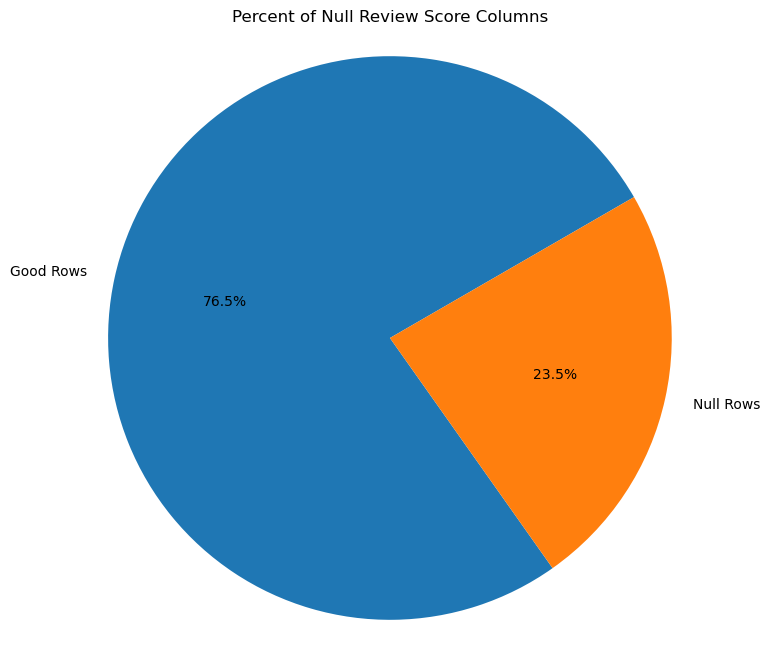

In [15]:
data = [start_rows, start_rows-end_rows]
labels = ['Good Rows', 'Null Rows']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=30)
plt.title('Percent of Null Review Score Columns')
plt.axis('equal')
plt.show()

In [16]:
# Cutting Listings down to all I care about
price_df = listings_df[['neighbourhood_group_cleansed','accommodates', 'bathrooms', 'bedrooms', 'beds', 
                              'price', 'review_scores_rating', 'review_scores_accuracy', 
                              'review_scores_cleanliness', 'review_scores_checkin', 
                              'review_scores_communication', 'review_scores_location', 
                              'review_scores_value']]

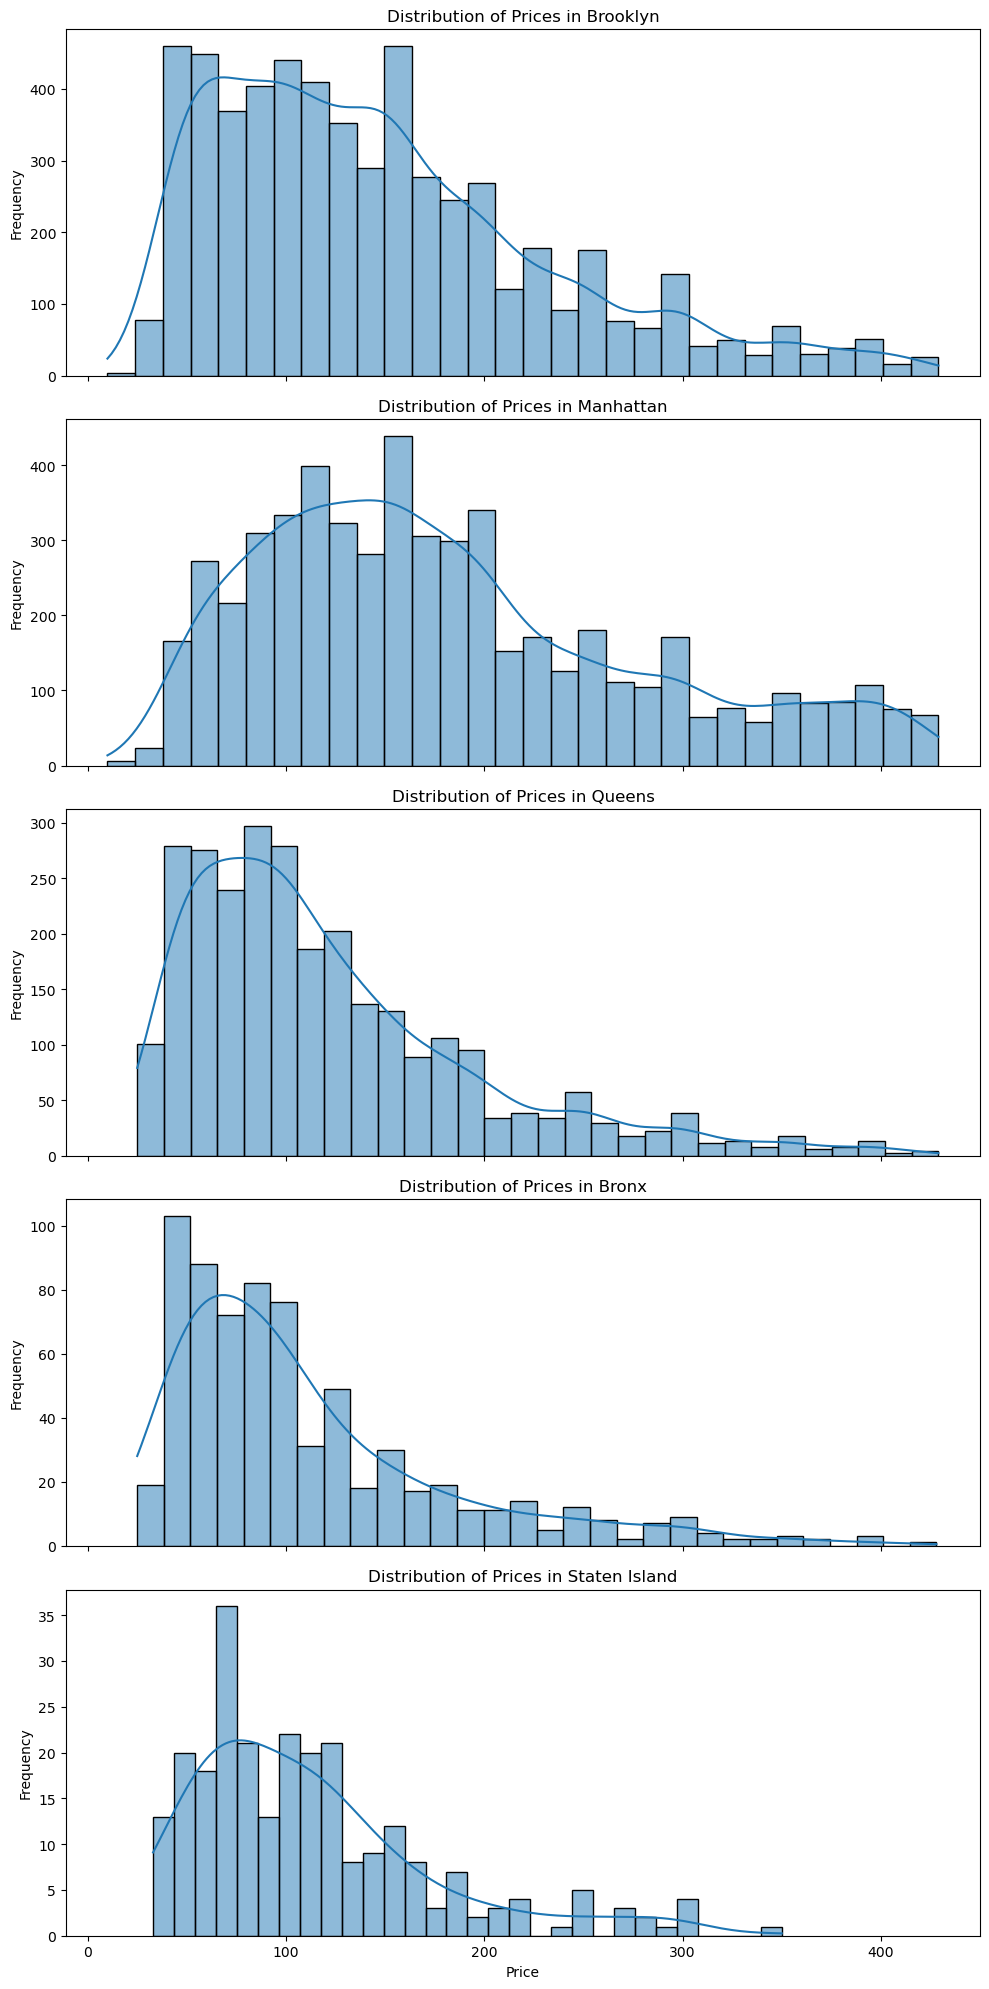

In [77]:
# List of neighborhood groups
neighborhood_groups = price_df['neighbourhood_group_cleansed'].unique()

# Create a figure with subplots for each neighborhood group
fig, axes = plt.subplots(len(neighborhood_groups), 1, figsize=(10, len(neighborhood_groups) * 4), sharex=True)

# Create a histogram for each neighborhood group
for ax, neighborhood in zip(axes, neighborhood_groups):
    subset = price_df[price_df['neighbourhood_group_cleansed'] == neighborhood]
    sns.histplot(subset['price'], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of Prices in {neighborhood}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


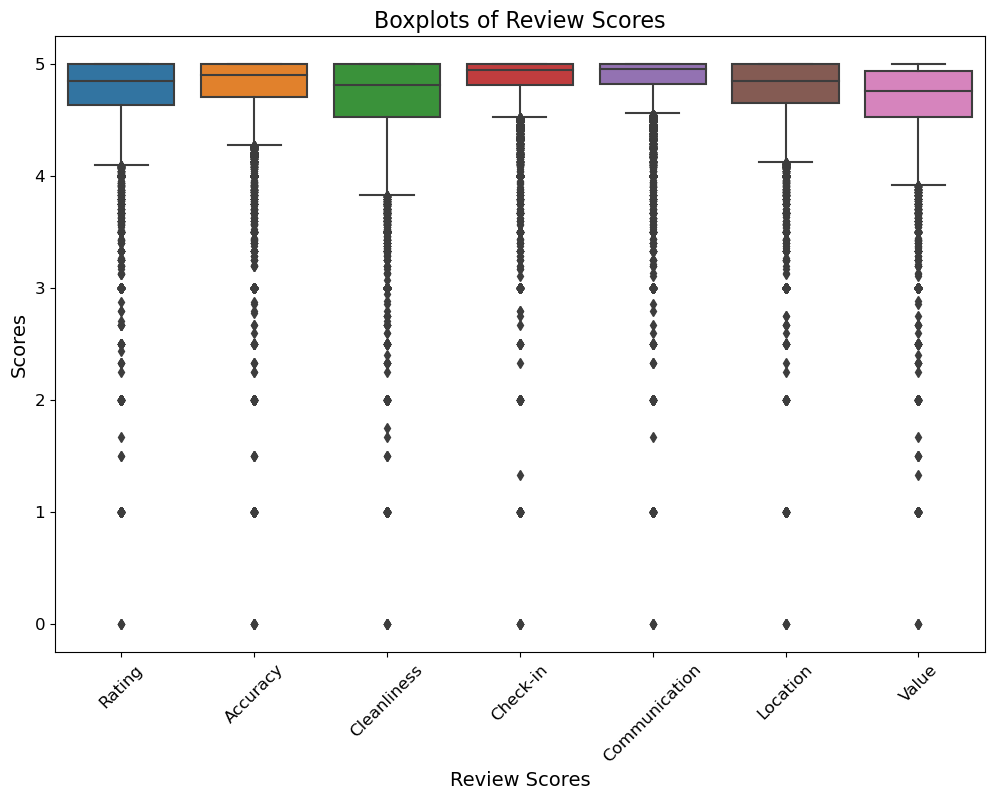

In [17]:
# Pretty up the column names
clean_names = {
    'review_scores_rating': 'Rating',
    'review_scores_accuracy': 'Accuracy',
    'review_scores_cleanliness': 'Cleanliness',
    'review_scores_checkin': 'Check-in',
    'review_scores_communication': 'Communication',
    'review_scores_location': 'Location',
    'review_scores_value': 'Value'
}

# Melt the DataFrame to long format for seaborn boxplot
melted_df = price_df.melt(value_vars=clean_names.keys(), var_name='Review Scores', value_name='Scores')

# Replace column names with clean names
melted_df['Review Scores'] = melted_df['Review Scores'].map(clean_names)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Review Scores', y='Scores', data=melted_df)
plt.title('Boxplots of Review Scores', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Review Scores', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.show()

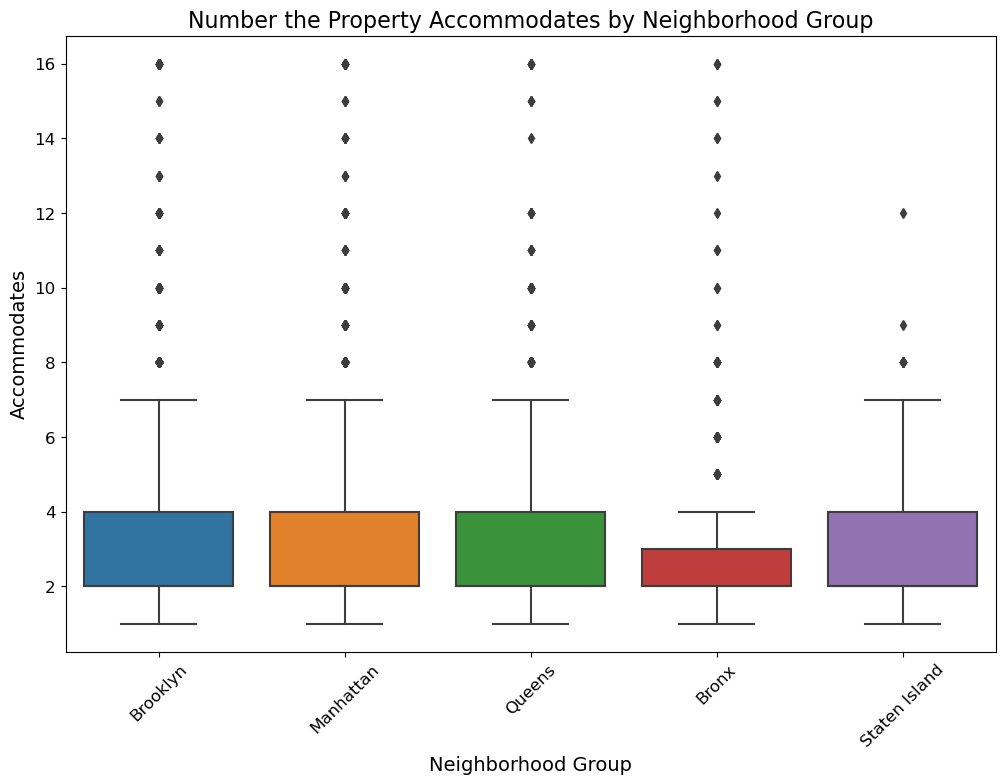

In [18]:

# Number of Accomodations by Neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group_cleansed', y='accommodates', data=price_df)
plt.title('Number the Property Accommodates by Neighborhood Group', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Accommodates', fontsize=14)
plt.show()


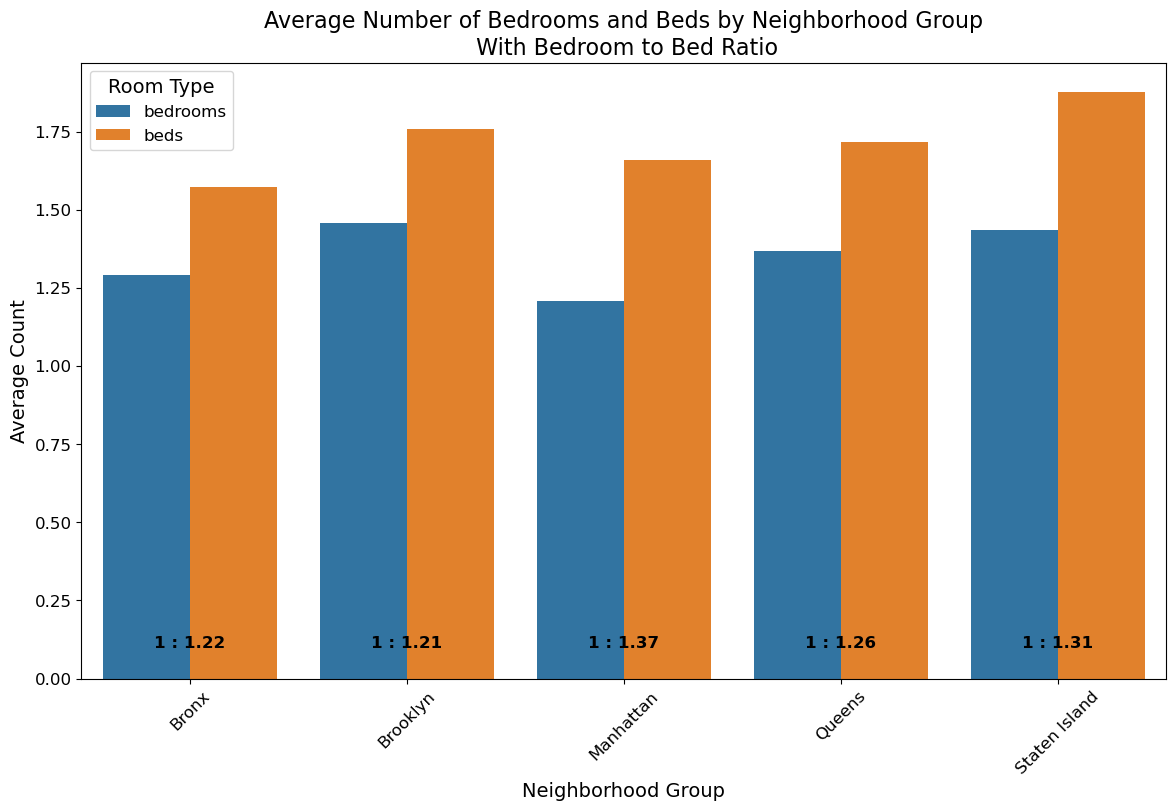

In [19]:
# Calculate the average number of bedrooms and beds by neighborhood group
average_bedrooms = price_df.groupby('neighbourhood_group_cleansed')['bedrooms'].mean().reset_index()
average_beds = price_df.groupby('neighbourhood_group_cleansed')['beds'].mean().reset_index()

# Merge the dataframes
merged_df = pd.merge(average_bedrooms, average_beds, on='neighbourhood_group_cleansed', suffixes=('_bedrooms', '_beds'))

# Calculate the ratio of bedrooms to beds
merged_df['Ratio'] = merged_df['beds'] / merged_df['bedrooms']

# Melt the dataframe for easier plotting
melted_df = merged_df.melt(id_vars=['neighbourhood_group_cleansed', 'Ratio'], 
                           value_vars=['bedrooms', 'beds'], 
                           var_name='Room Type', 
                           value_name='Average Count')

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='neighbourhood_group_cleansed', y='Average Count', hue='Room Type', data=melted_df)
plt.title('Average Number of Bedrooms and Beds by Neighborhood Group\n With Bedroom to Bed Ratio', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Average Count', fontsize=14)

# Annotate each bar with the ratio in the format "1 : X"
for i, row in merged_df.iterrows():
    ratio_text = f"1 : {row['Ratio']:.2f}"
    bar_plot.text(i, 0.1, ratio_text, color='black', ha="center", fontsize=12, weight='bold')

plt.legend(title='Room Type', fontsize=12, title_fontsize=14)
plt.show()


### Price

In [21]:
#Fix Price Data Type
price_df['price'] = price_df['price'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\iruka\AppData\Local\Temp\ipykernel_2836\2793758229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['price'] = price_df['price'].replace('[\$,]', '', regex=True).astype(float)


In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = price_df['price'].quantile(0.25)
Q3 = price_df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
price_df = price_df[(price_df['price'] >= lower_bound) & (price_df['price'] <= upper_bound)]

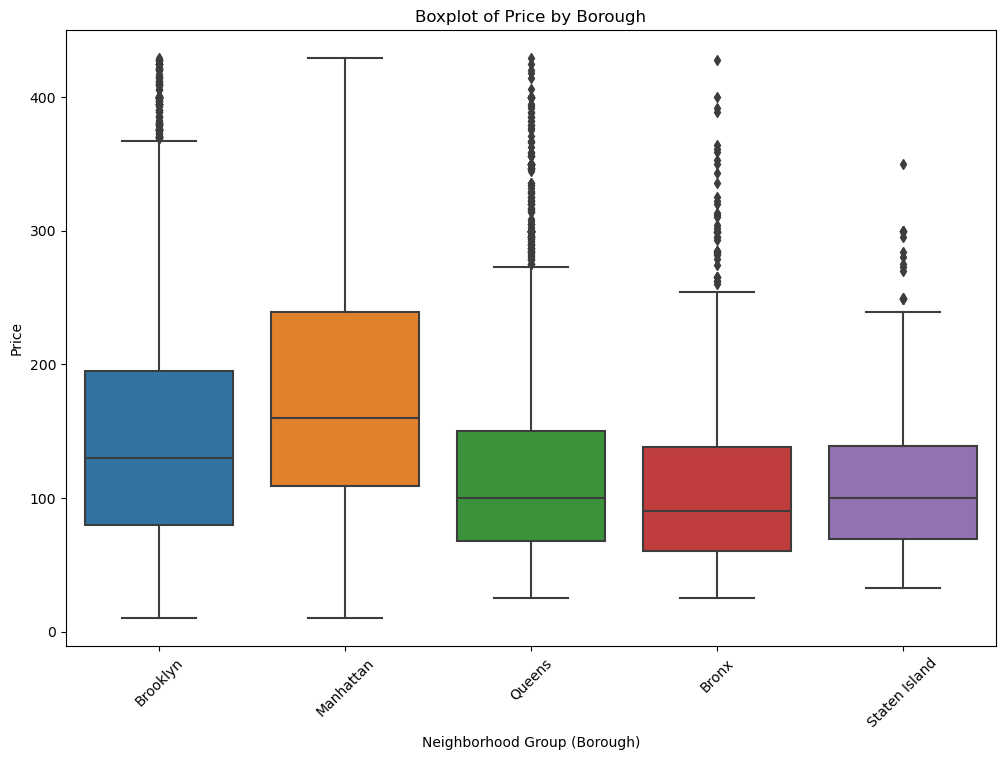

In [23]:
#Boxplot of all groups by price
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=price_df)
plt.title('Boxplot of Price by Borough')
plt.xlabel('Neighborhood Group (Borough)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

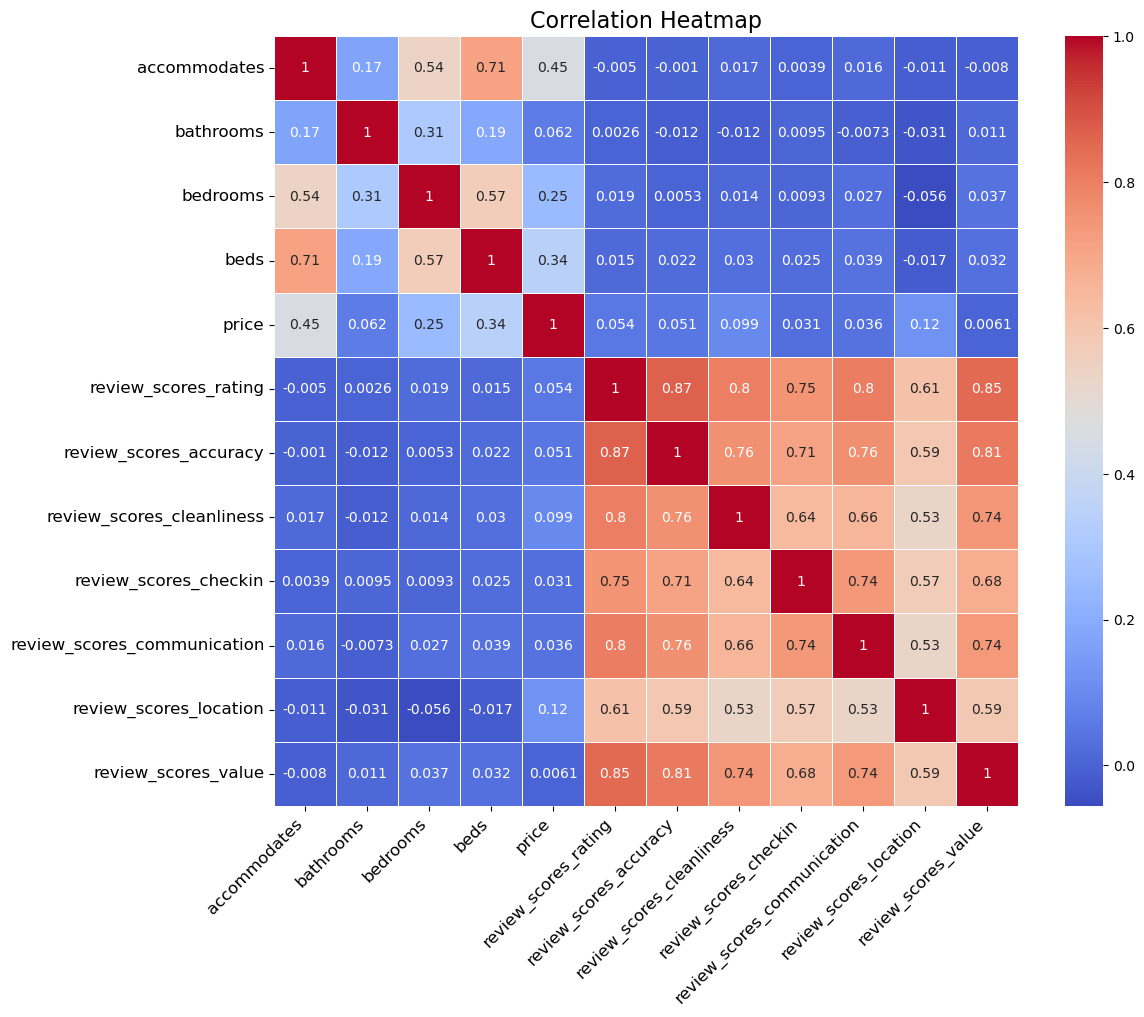

In [72]:
# Select only the numerical columns from price_df
numeric_columns = price_df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 
                              'price', 'review_scores_rating', 'review_scores_accuracy', 
                              'review_scores_cleanliness', 'review_scores_checkin', 
                              'review_scores_communication', 'review_scores_location', 
                              'review_scores_value']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap with correct axis labels
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Correct the axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment= 'right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [54]:
numeric_columns

,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,1,1.0,1.0,1.0,45.0,4.83,4.83,4.67,5.00,4.83,4.67,4.67
8,2,1.0,1.0,1.0,60.0,4.00,5.00,3.00,5.00,2.00,5.00,5.00
11,1,1.0,2.0,2.0,150.0,5.00,5.00,5.00,5.00,5.00,4.00,5.00
12,2,1.0,1.0,NaN,295.0,4.26,4.65,4.74,4.48,4.43,4.70,4.09
14,2,1.0,0.0,1.0,58.0,5.00,5.00,4.00,4.00,5.00,5.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
37533,2,1.0,1.0,1.0,115.0,5.00,5.00,4.89,5.00,5.00,4.78,5.00
37535,2,1.0,1.0,2.0,110.0,4.85,4.89,4.92,4.87,4.93,4.77,4.80
37536,2,1.0,1.0,1.0,65.0,3.80,3.80,4.20,3.80,4.20,3.80,3.80
37537,7,2.0,3.0,3.0,367.0,4.88,4.92,4.84,4.85,4.89,4.78,4.77
